In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trees = pd.read_csv('../data/covtype.csv')
trees['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [3]:
trees.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,Aspen


In [4]:
trees["Distance_To_Hydrology"] = ( (trees["Horizontal_Distance_To_Hydrology"] ** 2) + (trees["Vertical_Distance_To_Hydrology"] ** 2) ) ** (0.5)
trees.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True)
numerical_trees = trees[["Elevation","Aspect","Slope","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Distance_To_Hydrology", "Cover_Type"]]

In [5]:
numerical_trees.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Cover_Type
0,2596,51,3,510,221,232,148,6279,258.000000,Aspen
1,2590,56,2,390,220,235,151,6225,212.084889,Aspen
2,2804,139,9,3180,234,238,135,6121,275.769832,Lodgepole Pine
3,2785,155,18,3090,238,238,122,6211,269.235956,Lodgepole Pine
4,2595,45,2,391,220,234,150,6172,153.003268,Aspen


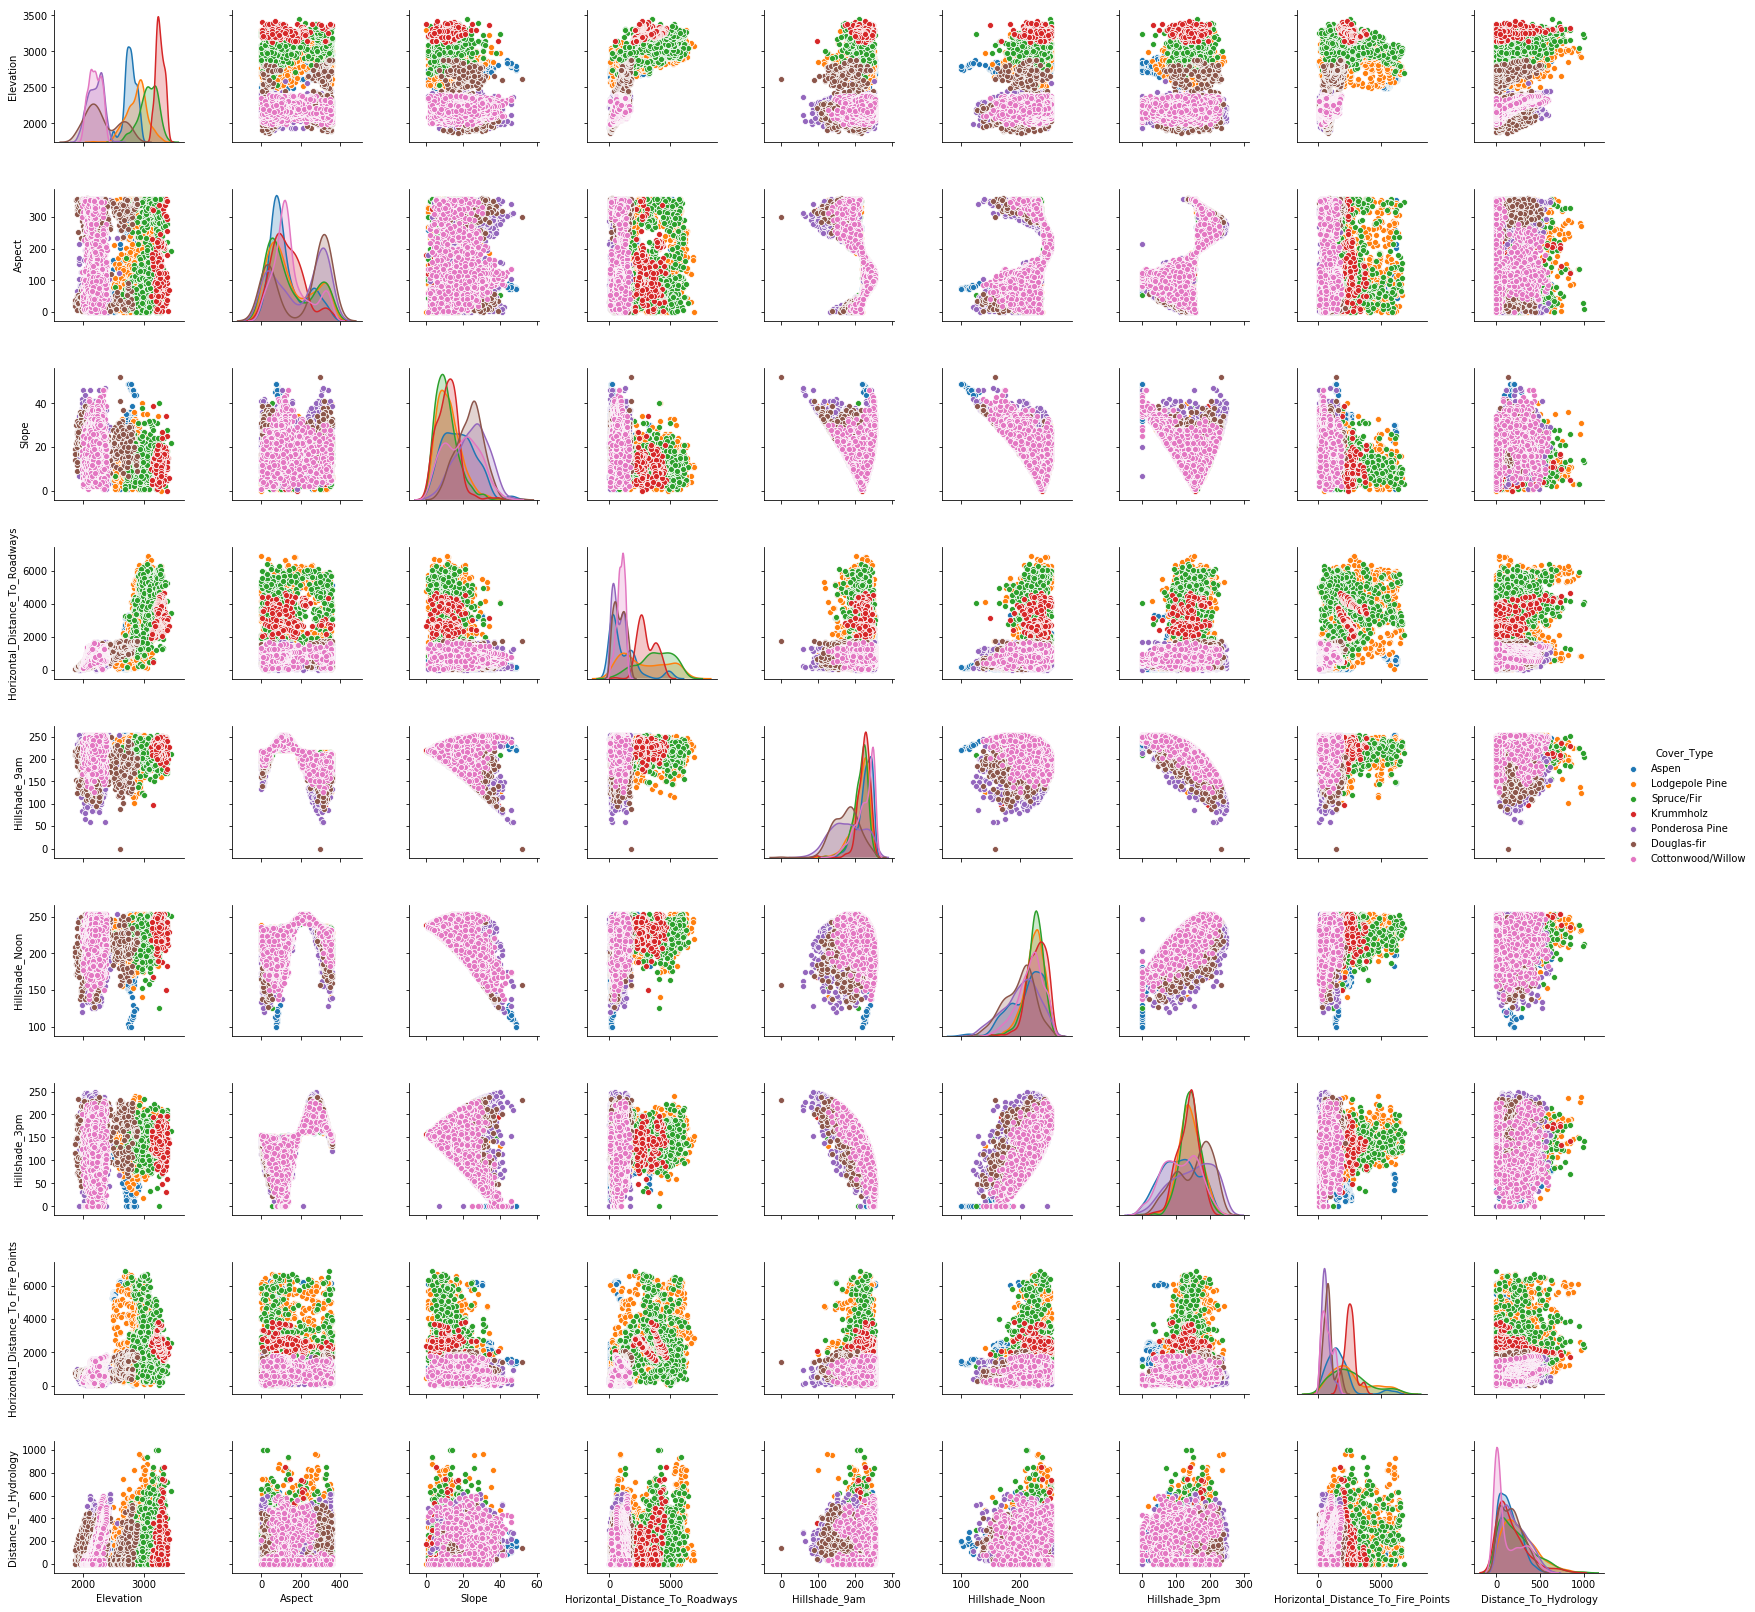

In [6]:
pp = sns.pairplot(data=numerical_trees.head(5000), hue='Cover_Type')

In [7]:
cols = list(trees.columns)
cols.remove('Cover_Type')
X = trees[cols]
Y = trees["Cover_Type"]

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(X)
model.get_support()
New_features.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(581012, 10)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(New_features, Y, test_size=0.30, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
from sklearn import metrics
y_pred = model.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

0.963884936662383

In [12]:
import importlib.util
spec = importlib.util.spec_from_file_location("GMM", "../code/GMM.py")
GMM = importlib.util.module_from_spec(spec)
spec.loader.exec_module(GMM)

In [13]:
tree_ = numerical_trees.head(10)
tree_ = tree_.drop(['Cover_Type'], axis=1)
tree_.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology
0,2596,51,3,510,221,232,148,6279,258.000000
1,2590,56,2,390,220,235,151,6225,212.084889
2,2804,139,9,3180,234,238,135,6121,275.769832
3,2785,155,18,3090,238,238,122,6211,269.235956
4,2595,45,2,391,220,234,150,6172,153.003268


In [14]:
import numpy as np
tree_ = tree_.convert_objects(convert_numeric=True)
tree_ = tree_.drop(tree_[tree_.Aspect == 0].index)
tree_ = tree_.drop(tree_[tree_.Elevation == 0].index)
tree_test = tree_[['Aspect', 'Elevation']].values
np.isfinite(tree_test).all()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


True

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
../code/GMM.py:55: RuntimeWarning: invalid value encountered in true_divide
  for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.covariance+self.reg_cov)],axis=0)


ValueError: array must not contain infs or NaNs

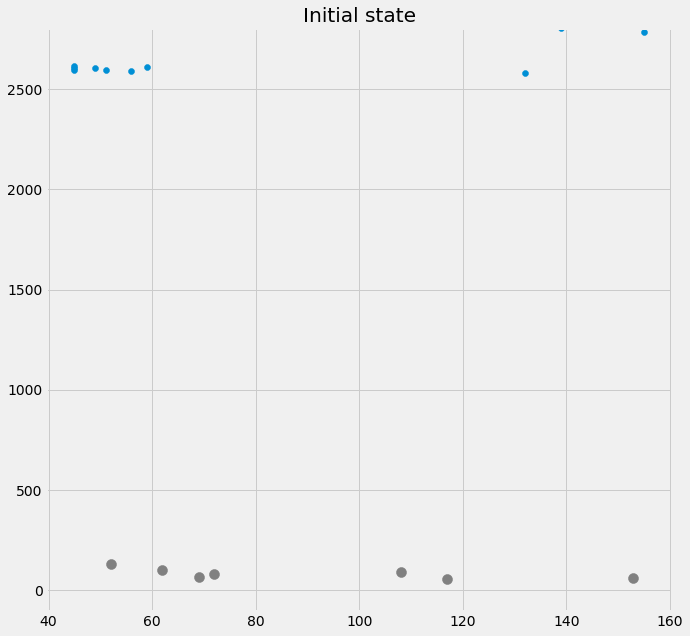

In [15]:
GMM_mod = GMM.GMM(tree_test, 7, 30)
GMM_mod.fit()